In [1]:
%matplotlib inline  
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


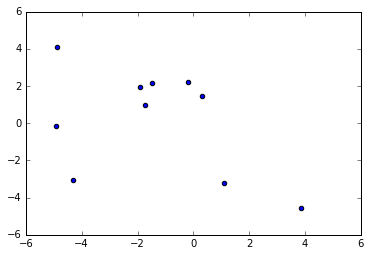

In [2]:
points = np.random.rand(10,2)*10-5
plt.scatter(points[:,0], points[:,1])
plt.show()

(-6.0, 6.0, -6.0, 6.0)

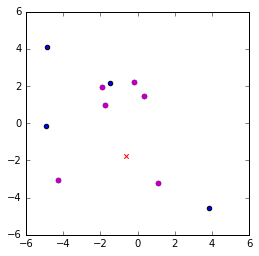

In [3]:
import util
pt = np.random.rand(2)*10-5
point_norms = np.diag(np.dot(points, np.transpose(points)))
nearest = util.k_nearest_neighbors(pt, points, 6, point_norms)
plt.scatter(pt[0],pt[1],color='r',marker='x')
plt.scatter(points[:,0], points[:,1])
plt.scatter(points[nearest,0],points[nearest,1], color='m')
plt.axis('square')

In [ ]:
from cvxpy import *
mu = np.load('../mu.npy')
sigma = np.load('../sigma.npy')
#mu = np.ones(mu.shape[0])

N = 10
ret = np.zeros(N)
ind = 0
for l in 10**np.linspace(-5, 3, num=N):
    b = Variable(mu.shape[0])
    c = Variable(mu.shape[0])
    objective = Maximize(mu.T*b - l*quad_form(b, sigma))
    constraints = [c >= b, c >= -b, sum(c) == 1, b <= 0.1, b>=-0.1]
    prob = Problem(objective, constraints)
    prob.solve()
    x = b.value
    x = np.reshape(x,-1)
    ret[ind] = np.inner(x,mu)
    ind += 1

In [ ]:
n = 10**np.linspace(-5, 1.5, num=N)
plt.semilogx(n, ret)


In [ ]:
x*sigma*x.T
np.dot(x,mu)

In [ ]:
x=b.value
x[np.fabs(x) > 0.001]

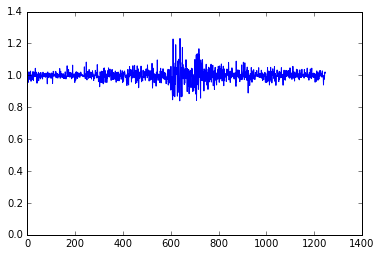

In [6]:
import util
data = util.load_matlab_sp500_data('portfolio.mat')
plt.plot(data.get_cl()[:,1])